# Libraries and Options Preamble

In [99]:
# Libraries imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import wrds
import re
import requests

from scipy.stats import kurtosis, skew
from scipy.stats import norm
from tabulate import tabulate
from matplotlib.ticker import StrMethodFormatter

# Set display settings for dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Set the float format to display numbers with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format


# Companies List

In [100]:
tickers = ['REGN', 'ABT', 'AES', 'AMZN', 'APD', 'MLM', 'BA', 'BAX', 'CAT',
           'CL', 'CMCSA', 'COP', 'COST', 'CTRA', 'CVX', 'DD', 'DIS', 'ECL',
            'EOG',  'FCX',  'BKNG', 'UHS', 'HON', 'HSIC',
           'INTC', 'JNJ', 'BBY', 'KO', 'LIN', 'LMT', 'MCD', 'MDLZ', 'MRK',
           'MRO', 'MSFT', 'NEM', 'NFLX',  'PEP', 'PFE', 'PG', 'PXD',
           'SEE', 'T', 'TGT', 'TMO', 'UNP', 'UPS', 'VZ', 'WMT', 'XOM']


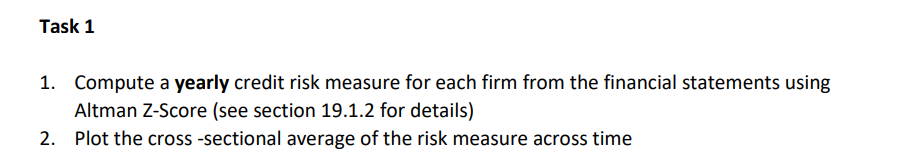

# Task 1.1 Altman Z-score

In [101]:
# Import csv file 
af = pd.read_csv('altmanz.csv')

In [102]:
# Altman Z-score calculation
af['AltmanZ']= ((af['wcap'] / af['at'])*1.2) + ((af['re'] / af['at'])*1.4) + ((af['ebit'] / af['at'])*3.3) + ((af['mkvalt'] / af['lt'])*0.6) + (af['sale'] / af['at'])

In [103]:
af.head()


,Unnamed: 0,fyear,tic,wcap,at,re,ebit,mkvalt,lt,sale,AltmanZ
0,0,2010.00,ABT,5055.10,59462.27,17560.26,8038.78,74116.00,36985.80,35166.72,2.76
1,1,2011.00,ABT,8288.55,60276.89,18310.18,8996.45,88302.41,35750.75,38851.26,3.21
2,3,2012.00,ABT,18042.41,67234.94,20557.32,9783.51,103271.69,40421.71,39873.91,3.36
3,5,2013.00,ABT,9740.00,42953.00,19967.00,2674.00,59338.60,17686.00,21848.00,3.65
4,7,2014.00,ABT,4729.00,41275.00,17821.00,2927.00,67891.74,19636.00,20247.00,3.54


# Task 1.2 Plot the cross-sectional average

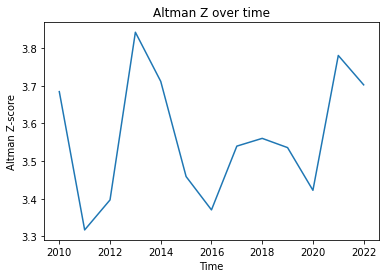

In [104]:
# x axis values
x = af.groupby('fyear').mean().index
# corresponding y axis values, groupby and mean takes the average across companies for  each year 
y = af.groupby('fyear').mean()['AltmanZ']

# plotting the points
plt.plot(x, y)


# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Altman Z-score')

# giving a title to my graph
plt.title('Altman Z over time')

# function to show the plot
plt.show()


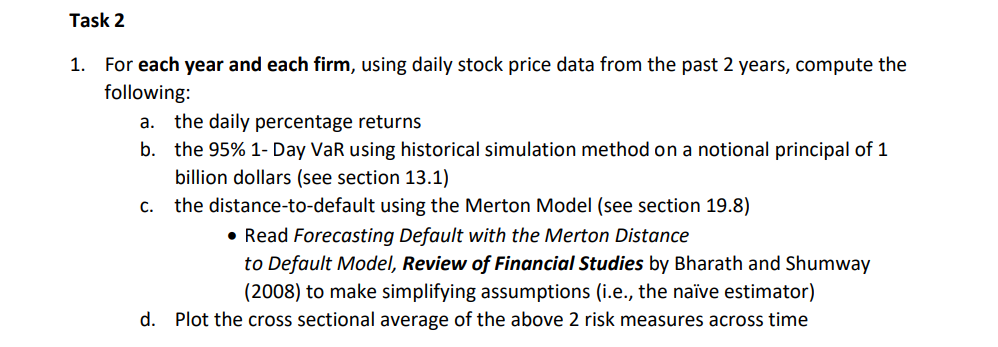

# Task 2.1.a Daily Percentage returns

In [105]:
# Import csv 
df = pd.read_csv('daily_price.csv')

# Set index as datetime
df.index = pd.to_datetime(df['Date'])

# Drop irrelevant columns
df = df.drop(['Date'], axis = 1)

# Remove index name
df.index.name = None


In [106]:
# Retrieve montly prices from 2010-2022
monthly_prices = df.resample('M').last()[12:]

# Daily Returns

* Using ```.pct_change()``` to calculate daily returns => (P1-P0)/P0

In [107]:
# Daily percentage returns using .pct_change() method
df = df.pct_change().dropna()
df.head()

,ABT,AES,AMZN,APD,BA,BAX,BBY,BKNG,CAT,CL,CMCSA,COP,COST,CTRA,CVX,DD,DIS,ECL,EOG,FCX,HON,HSIC,INTC,JNJ,KO,LIN,LMT,MCD,MDLZ,MLM,MRK,MRO,MSFT,NEM,NFLX,PEP,PFE,PG,PXD,REGN,SEE,T,TGT,TMO,UHS,UNP,UPS,VZ,WMT,XOM
2009-01-05,-0.02,0.06,-0.01,0.04,0.02,-0.02,0.03,-0.02,-0.02,-0.02,-0.05,0.01,-0.02,0.07,0.00,-0.02,-0.02,-0.02,0.00,0.06,-0.01,0.00,-0.02,-0.01,-0.01,0.02,-0.02,-0.00,0.01,0.03,-0.02,0.01,0.01,-0.04,0.07,-0.01,-0.01,-0.01,0.08,0.02,-0.00,-0.03,0.04,0.00,0.01,0.04,-0.02,-0.06,-0.01,-0.00
2009-01-06,-0.03,0.03,0.06,0.07,0.00,-0.01,0.04,0.05,-0.01,-0.02,0.01,0.00,-0.02,0.01,0.01,0.07,0.03,-0.02,0.01,0.09,0.05,-0.01,0.03,-0.01,-0.02,0.04,0.00,-0.02,0.01,-0.02,-0.02,0.02,0.01,0.02,0.03,0.00,-0.02,-0.00,0.03,-0.01,0.03,-0.00,0.05,-0.01,0.02,0.04,0.00,-0.02,-0.01,-0.02
2009-01-07,-0.01,-0.04,-0.02,-0.04,-0.03,-0.00,-0.05,-0.05,-0.05,-0.01,-0.03,-0.04,-0.03,-0.07,-0.04,0.00,-0.05,-0.00,-0.03,-0.09,-0.04,-0.02,-0.06,-0.01,0.00,-0.06,-0.03,-0.01,-0.00,-0.03,-0.02,-0.04,-0.06,-0.11,-0.01,-0.03,-0.02,-0.02,-0.03,-0.05,-0.02,-0.02,-0.03,-0.01,0.00,-0.08,-0.04,0.01,-0.01,-0.03
2009-01-08,0.01,0.03,0.02,0.02,0.00,0.00,0.00,0.03,0.01,-0.01,0.02,0.01,0.01,0.01,0.00,-0.02,-0.01,-0.01,0.01,0.05,0.00,-0.00,0.01,-0.00,0.01,0.01,-0.01,-0.01,0.01,0.01,-0.00,0.03,0.03,0.08,0.01,-0.01,0.01,-0.01,0.02,0.02,0.01,-0.00,0.01,-0.03,0.01,-0.01,-0.02,0.02,-0.07,0.01
2009-01-09,-0.00,0.00,-0.03,-0.03,-0.01,0.00,-0.05,-0.02,-0.02,-0.01,-0.03,-0.04,-0.03,-0.05,-0.02,0.00,-0.03,-0.01,-0.04,-0.02,-0.01,-0.01,-0.03,0.00,-0.01,-0.01,-0.00,-0.01,-0.01,-0.06,-0.02,-0.03,-0.03,-0.02,-0.03,-0.01,-0.01,-0.01,-0.03,-0.04,-0.03,-0.02,-0.06,-0.00,-0.00,-0.02,-0.02,-0.01,0.00,-0.02


# Task 2.1.b 95% 1-day VaR using Historical Simulation with a principal of $1 million

In [108]:
# Create a dataframe 
var = pd.DataFrame(index = np.arange(2010,2023,1),columns = df.columns)

# Iterate through the years where VaR for 2010 is using data from 2009 and 2010. .quantile(0.05) gives the 95% VaR and that is then multipied by the principal of $1 million
for i in range(2009,2022,1):
    var[var.index == i+1] = df[df.index.year.isin([i, i+1])].quantile(0.05)*1000000



# Task 2.1.d Plot the cross sectional average of the above 2 risk measures across time

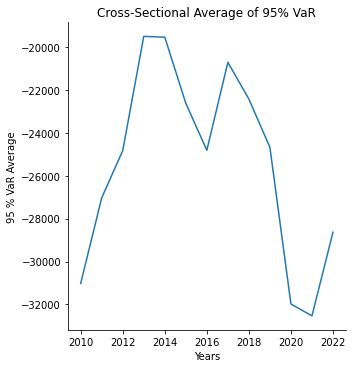

In [109]:
# Graph Mean VaR across companies and across time
fig = sns.relplot(data=var.mean(axis=1), kind='line')
fig.set(xlabel='Years',
        ylabel='95 % VaR Average',
        title='Cross-Sectional Average of 95% VaR')
fig


# Task 2.1.c Distance to Default Using the Naive Method

In [110]:
# Importing Data from csv
data = pd.read_csv('fundamental.csv')

In [111]:
# Shares outstanding reshaped into long format
csho = data.dropna().pivot(index='fyear', columns='tic', values=['datadate','csho', 'dt'])['csho']

# Total debt reshaped into long format
dt = data.dropna().pivot(index='fyear', columns='tic', values=['csho', 'dt'])['dt']

# Fill missing value with mean
csho['TGT'] = csho['TGT'].fillna(csho['TGT'].mean())

# Fill missing value with mean
dt['TGT'] = dt['TGT'].fillna(dt['TGT'].mean())


In [112]:
# Set monthly prices index to yearly format => 2010
monthly_prices.index = monthly_prices.index.year

In [113]:
# Extend data to monthly frequency
csho = pd.concat([csho]*12)

# Extend data to monthly frequency
dt = pd.concat([dt]*12)


In [114]:
# Create column duplicate of the index
dt['year'] = dt.index
csho['year'] = csho.index

#Sort by the new column => by the year
dt = dt.sort_values('year', ascending=True)
csho = csho.sort_values('year', ascending=True)*monthly_prices


In [115]:
# Remove the year column as no longer needed
csho = csho.drop('year', axis=1)
dt = dt.drop('year', axis=1)


In [116]:
# Extract year from date column
df['year'] = df.index.year

# Group by year and calculate the mean
mu = df.groupby('year').mean().shift(1).dropna()
mu.index = monthly_prices.index.unique()
mu = pd.concat([mu]*12)
mu['year'] = mu.index
mu = mu.sort_values('year', ascending=True)
mu = mu.drop('year', axis=1)


In [117]:
# Extract year from date column
df['year'] = df.index.year

# Group by year and calculate the mean
sigma_e = df.groupby('year').std().shift(1).dropna()
sigma_e.index = monthly_prices.index.unique()
sigma_e = pd.concat([sigma_e]*12)
sigma_e['year'] = sigma_e.index
sigma_e = sigma_e.sort_values('year', ascending=True)
sigma_e = sigma_e.drop('year', axis=1)


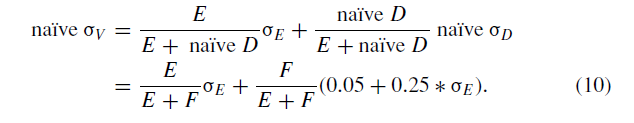

In [118]:
# Naive sigma_v calculation
naive_sigma_v = (csho/(csho+dt))*sigma_e + (dt/(csho+dt))*(0.05 + 0.25*sigma_e)

In [119]:
# Making sure all data is in numerical form
naive_sigma_v = naive_sigma_v.astype(float)
csho = csho.astype(float)
dt = dt.astype(float)
mu = mu.astype(float)
sigma_e = sigma_e.astype(float)

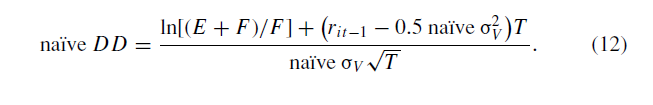

In [120]:
# Calculating naive distance to default
naive_DD = (np.log((csho+dt)/dt)+(mu-0.5*naive_sigma_v**2)*1)/(naive_sigma_v*np.sqrt(1))

In [121]:
# creating year column to use to calculate the average across companies 
naive_DD['year'] = naive_DD.index

# Task 2.1.d Plot the cross sectional average of the above 2 risk measures across time

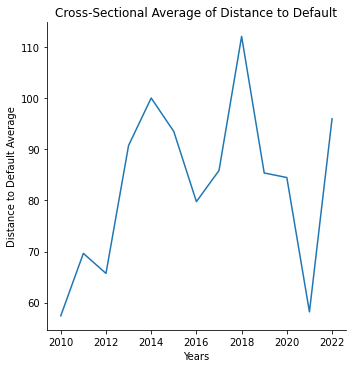

In [122]:
#plotting average across companies and across time
ax = sns.relplot(data=(naive_DD.groupby('year').mean()).mean(axis=1), kind='line')

ax.set(xlabel='Years',
       ylabel='Distance to Default Average',
       title='Cross-Sectional Average of Distance to Default')
ax

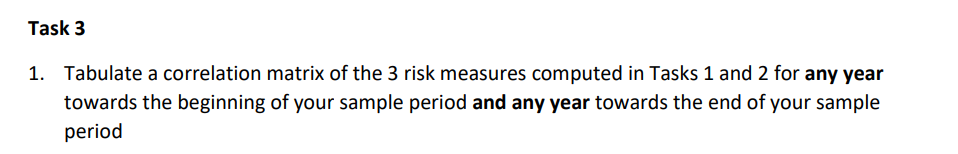

# Task 3 Correlation matrix for 2021

In [123]:
# Empty Dataframe
task_3_2021 = pd.DataFrame()

In [124]:
# Fetching Altman Z-score data across companies for 2021
task_3_2021['AltmanZScore'] = af[af['fyear']==2021.0].pivot(index = ['fyear'], columns= ['tic'], values = ['AltmanZ']).transpose()

In [125]:
# Setting index to company tickers
task_3_2021.index = df.columns[:-1]


In [126]:
# Fetching 95% VaR data across companies for 2021
task_3_2021['95%_VaR'] = var.iloc[-2]

In [127]:
# Fetching Distance to Default data across companies for 2021
task_3_2021['DD'] = naive_DD.groupby('year').mean().iloc[-2]

In [128]:
# Making sure all data is of numerical type
task_3_2021 = task_3_2021.astype(float)

# Correlation table calculation
corr_matrix_year1 = task_3_2021.corr()


<AxesSubplot:title={'center':'Correlation of Risk Measures 2021'}, xlabel='Risk Measures', ylabel='Risk Measures'>

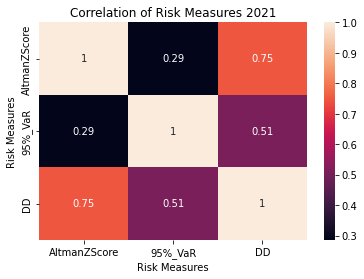

In [129]:
# Plotting correlation matrix across risk measures
corr = sns.heatmap(corr_matrix_year1, annot=True)
corr.set(xlabel='Risk Measures',
         ylabel='Risk Measures',
         title='Correlation of Risk Measures 2021')
corr


# Task 3 Correlation matrix for 2011

In [130]:
# Empty Dataframe
task_3 = pd.DataFrame()

In [131]:
# Fetching Altman Z-score data across companies for 2011
task_3['AltmanZScore'] = af[af['fyear']==2011.0].pivot(index = ['fyear'], columns= ['tic'], values = ['AltmanZ']).transpose()

In [132]:
# Setting index to company tickers
task_3.index = df.columns[:-1]


In [133]:
# Fetching 95% VaR data across companies for 2011
task_3['95%_VaR'] = var.iloc[1]


In [134]:
# Fetching Distance to Default data across companies for 2011
task_3['DD'] = naive_DD.groupby('year').mean().iloc[1]


In [135]:
# Making sure all data is of numerical type
task_3 = task_3.astype(float)

# Correlation table calculation
corr_matrix_year1 = task_3.corr()


<AxesSubplot:title={'center':'Correlation of Risk Measures 2011'}, xlabel='Risk Measures', ylabel='Risk Measures'>

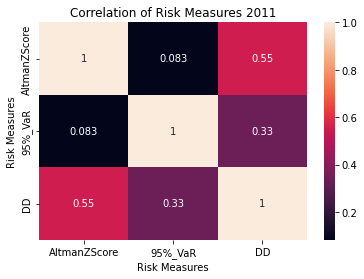

In [136]:
# Plotting correlation matrix across risk measures
corr = sns.heatmap(corr_matrix_year1, annot=True)
corr.set(xlabel='Risk Measures',
         ylabel='Risk Measures',
         title='Correlation of Risk Measures 2011')
corr
